# Tối đa hóa lợi nhuận sử dụng Linear Algebra

Bài toán: Tìm điểm tối đa hóa lợi nhuận cho doanh nghiệp sản xuất nhiều sản phẩm với các ràng buộc về tài nguyên.


In [16]:
# Cài đặt các package cần thiết (chạy cell này một lần)
import sys
import subprocess

def install_package(package):
    try:
        __import__(package)
        print(f"✅ {package} đã được cài đặt")
    except ImportError:
        print(f"📦 Đang cài đặt {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package, "--break-system-packages", "--user"])
        print(f"✅ Đã cài đặt {package}")

# Cài đặt các package
packages = ['ipykernel', 'numpy', 'matplotlib', 'scipy', 'seaborn']
for pkg in packages:
    install_package(pkg)

print("\n✅ Hoàn tất! Vui lòng restart kernel và chạy lại các cell.")


✅ ipykernel đã được cài đặt
✅ numpy đã được cài đặt
✅ matplotlib đã được cài đặt
✅ scipy đã được cài đặt
✅ seaborn đã được cài đặt

✅ Hoàn tất! Vui lòng restart kernel và chạy lại các cell.


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import linprog
import seaborn as sns

# Thiết lập style cho plots
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    try:
        plt.style.use('seaborn-darkgrid')
    except:
        plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline


# Áp dụng Linear Algebra vào bài toán Profit Maximization

Notebook này minh họa cách các khái niệm Linear Algebra được áp dụng trong bài toán thực tế:
- **Scalar, Vector, Matrix**: Các cấu trúc dữ liệu trong bài toán
- **Dot Products & Matrix Operations**: Các phép toán được sử dụng
- **Reduction Operations**: Tổng hợp và phân tích dữ liệu


## 1. Định nghĩa bài toán

**Bài toán**: Tối đa hóa lợi nhuận với 2 sản phẩm:
- Sản phẩm A: lợi nhuận 50,000 VNĐ/đơn vị
- Sản phẩm B: lợi nhuận 40,000 VNĐ/đơn vị

**Ràng buộc**:
- Nguyên liệu: 2A + 3B ≤ 120 (đơn vị)
- Lao động: 4A + 2B ≤ 160 (giờ)
- A ≥ 0, B ≥ 0


SCALAR, VECTOR VÀ MATRIX

📌 SCALAR (0D):
   profit_A = 50 (nghìn VNĐ)
   profit_B = 40 (nghìn VNĐ)
   Shape: (), Dimension: 0D

📌 VECTOR (1D):
   profit_vector = [50 40]
   quantity_vector = [30 20]
   Shape: (2,), Dimension: 1D
   Norm: ||profit_vector|| = 64.03

📌 MATRIX (2D):
   constraint_matrix = 
[[2 3]
 [4 2]]
   Shape: (2, 2), Dimension: 2D
   Rank: 2
   Determinant: -8.00


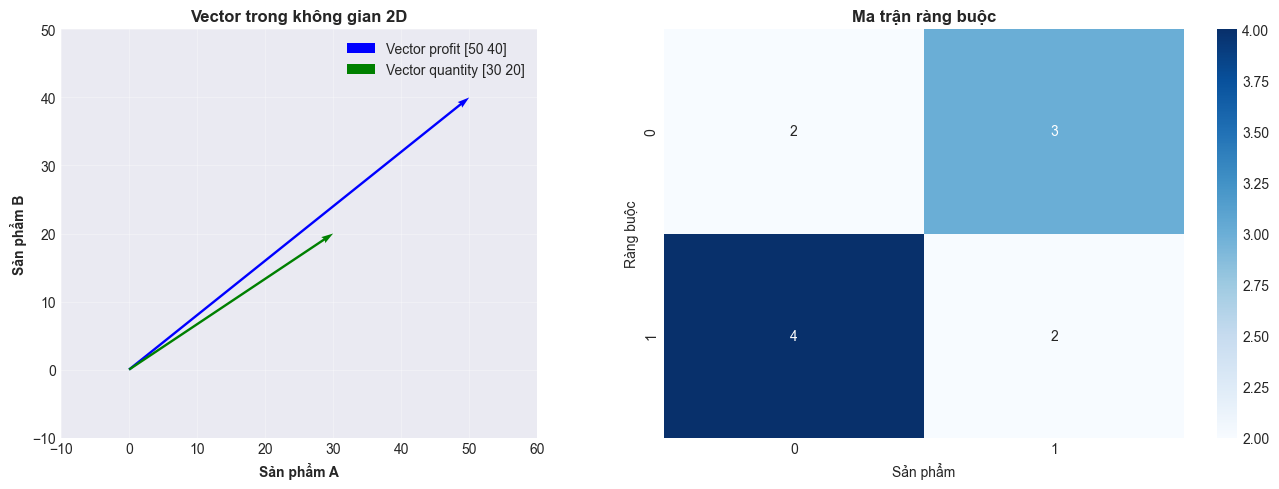

In [ ]:
# Định nghĩa bài toán sử dụng Linear Algebra
print("=" * 70)
print("ĐỊNH NGHĨA BÀI TOÁN SỬ DỤNG LINEAR ALGEBRA")
print("=" * 70)

# 📌 SCALAR: Số vô hướng (0D) - một giá trị đơn lẻ
profit_A_scalar = 50  # Lợi nhuận mỗi đơn vị sản phẩm A (nghìn VNĐ)
profit_B_scalar = 40  # Lợi nhuận mỗi đơn vị sản phẩm B (nghìn VNĐ)

print("\n📌 SCALAR (0D) - Số vô hướng:")
print(f"   profit_A = {profit_A_scalar} (nghìn VNĐ)")
print(f"   profit_B = {profit_B_scalar} (nghìn VNĐ)")
print(f"   → Đây là các giá trị đơn lẻ, không có chiều (0D)")

# 📌 VECTOR: Mảng 1 chiều (1D) - danh sách các giá trị
# Vector hệ số hàm mục tiêu (cần minimize nên dùng negative)
# Hàm mục tiêu: Profit = 50A + 40B (tối đa hóa)
# linprog chỉ minimize, nên ta chuyển thành: minimize -50A - 40B
c = np.array([-50, -40])  # Vector hệ số hàm mục tiêu

# Vector giới hạn tài nguyên
b = np.array([120, 160])  # Vector giới hạn: [nguyên liệu, lao động]

print("\n📌 VECTOR (1D) - Mảng 1 chiều:")
print(f"   c (hệ số hàm mục tiêu) = {c}")
print(f"   b (giới hạn tài nguyên) = {b}")
print(f"   Shape: {c.shape}, Dimension: {c.ndim}D")
print(f"   → Vector là danh sách các giá trị, có 1 chiều")

# 📌 MATRIX: Mảng 2 chiều (2D) - bảng các giá trị
# Ma trận ràng buộc Ax <= b
A = np.array([
    [2, 3],   # Ràng buộc nguyên liệu: 2A + 3B
    [4, 2]    # Ràng buộc lao động: 4A + 2B
])

print("\n📌 MATRIX (2D) - Mảng 2 chiều:")
print(f"   A (ma trận ràng buộc) = \n{A}")
print(f"   Shape: {A.shape}, Dimension: {A.ndim}D")
print(f"   Rank: {np.linalg.matrix_rank(A)}")
print(f"   → Matrix là bảng các giá trị, có 2 chiều (hàng × cột)")

# Ràng buộc biến: x >= 0
x_bounds = [(0, None), (0, None)]

print("\n📌 DOT PRODUCT - Hàm mục tiêu dạng vector:")
print(f"   Profit(x) = c^T @ x = {c} @ x")
print(f"   Với x = [A, B] là vector số lượng sản phẩm")
print(f"   → Dot product (c^T @ x) tính tổng tích: c[0]*x[0] + c[1]*x[1]")


## 2. Giải bài toán và áp dụng Linear Algebra


DOT PRODUCTS VÀ MATRIX OPERATIONS

📌 1. DOT PRODUCT (Vector · Vector):
   profit_vector = [50 40]
   quantity_vector = [30 20]
   np.dot(profit_vector, quantity_vector) = 2300
   profit_vector @ quantity_vector = 2300
   → Tổng lợi nhuận = 2300 nghìn VNĐ

📌 2. ELEMENT-WISE MULTIPLICATION (*):
   profit_vector * quantity_vector = [1500  800]
   → Lợi nhuận từng sản phẩm: A=1500, B=800

📌 3. MATRIX-VECTOR MULTIPLICATION:
   A = [[2 3]
 [4 2]]
   x = [30 20]
   A @ x = [120 160]
   → Sử dụng tài nguyên: Nguyên liệu=120, Lao động=160


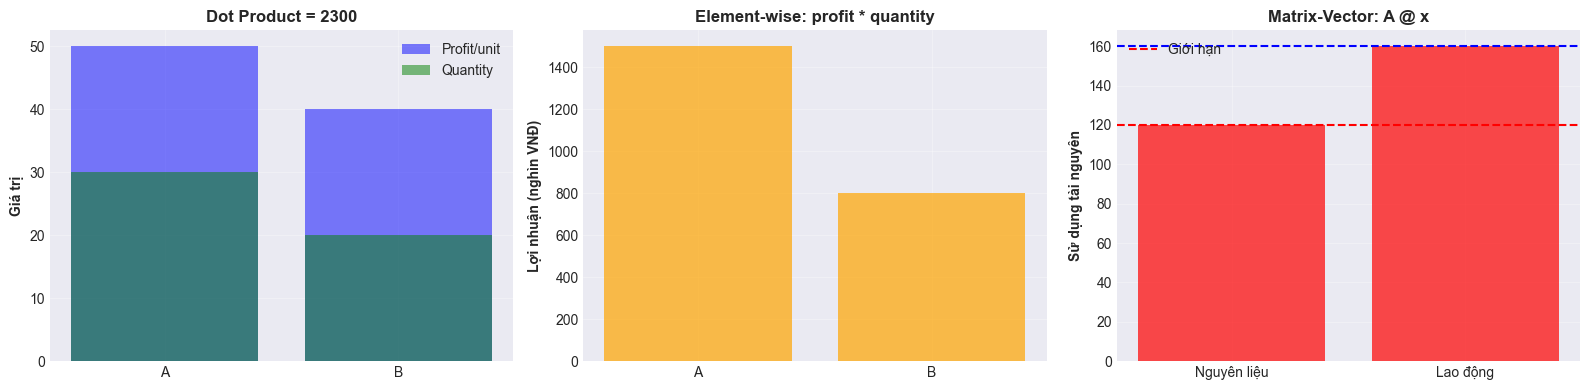

In [ ]:
# Giải bài toán tối ưu hóa tuyến tính
print("\n" + "=" * 70)
print("GIẢI BÀI TOÁN VÀ ÁP DỤNG LINEAR ALGEBRA")
print("=" * 70)

# Giải bài toán
result = linprog(c, A_ub=A, b_ub=b, bounds=x_bounds, method='highs')

if result.success:
    optimal_A = result.x[0]
    optimal_B = result.x[1]
    max_profit = -result.fun  # Đổi dấu vì ta đã minimize negative profit
    x_optimal = result.x  # Vector nghiệm tối ưu
    
    print(f"\n✅ Tìm thấy nghiệm tối ưu!")
    print(f"\n📌 VECTOR NGHIỆM (1D):")
    print(f"   x* = {x_optimal}")
    print(f"   → Số lượng sản phẩm A tối ưu: {optimal_A:.2f} đơn vị")
    print(f"   → Số lượng sản phẩm B tối ưu: {optimal_B:.2f} đơn vị")
    
    # 📌 DOT PRODUCT: Tính lợi nhuận
    profit_vector = np.array([profit_A_scalar, profit_B_scalar])
    profit_dot = profit_vector @ x_optimal
    print(f"\n📌 DOT PRODUCT (Vector · Vector):")
    print(f"   profit_vector = {profit_vector}")
    print(f"   x* = {x_optimal}")
    print(f"   profit_vector @ x* = {profit_vector} @ {x_optimal} = {profit_dot:.2f}")
    print(f"   → Lợi nhuận tối đa = {max_profit:.2f} nghìn VNĐ = {max_profit * 1000:,.0f} VNĐ")
    print(f"   → Dot product tính tổng tích: profit[0]*x[0] + profit[1]*x[1]")
    
    # 📌 MATRIX-VECTOR MULTIPLICATION: Kiểm tra ràng buộc
    constraints_used = A @ x_optimal
    print(f"\n📌 MATRIX-VECTOR MULTIPLICATION:")
    print(f"   A = \n{A}")
    print(f"   x* = {x_optimal}")
    print(f"   A @ x* = {constraints_used}")
    print(f"   → Sử dụng tài nguyên: Nguyên liệu={constraints_used[0]:.2f} / {b[0]}, Lao động={constraints_used[1]:.2f} / {b[1]}")
    print(f"   → Matrix-vector multiplication: mỗi hàng của A nhân với x*")
    
    # 📌 ELEMENT-WISE OPERATIONS
    element_profit = profit_vector * x_optimal
    print(f"\n📌 ELEMENT-WISE MULTIPLICATION (*):")
    print(f"   profit_vector * x* = {profit_vector} * {x_optimal} = {element_profit}")
    print(f"   → Lợi nhuận từng sản phẩm: A={element_profit[0]:.2f}, B={element_profit[1]:.2f}")
    print(f"   → Element-wise: nhân từng phần tử tương ứng")
    
    # 📌 REDUCTION OPERATIONS
    total_profit = np.sum(element_profit)
    mean_profit = np.mean(element_profit)
    print(f"\n📌 REDUCTION OPERATIONS:")
    print(f"   sum(profit * x*) = {total_profit:.2f} (tổng tất cả)")
    print(f"   mean(profit * x*) = {mean_profit:.2f} (trung bình)")
    print(f"   → Reduction: giảm chiều từ vector → scalar")
    
    # 📌 CONSTRAINT CHECKING (Matrix-Vector comparison)
    constraint_check = A @ x_optimal <= b
    print(f"\n📌 CONSTRAINT CHECKING (Matrix-Vector comparison):")
    print(f"   A @ x* <= b: {constraint_check}")
    print(f"   → Tất cả ràng buộc thỏa mãn: {np.all(constraint_check)}")
else:
    print("❌ Không tìm thấy nghiệm tối ưu!")
    print(result.message)


## 3. Visualization


REDUCTION OPERATIONS

Dữ liệu gốc (sản phẩm × tháng):
[[50 40 35]
 [45 42 38]
 [60 55 50]]
Shape: (3, 3)

📌 REDUCTION (keepdims=False):
   sum(axis=0): [155 137 123] → Shape: (3,) (giảm từ (3,3) → (3,))
   sum(axis=1): [125 125 165] → Shape: (3,) (giảm từ (3,3) → (3,))
   mean(axis=0): [51.66666667 45.66666667 41.        ]

📌 NON-REDUCTION (keepdims=True):
   sum(axis=0, keepdims=True):
[[155 137 123]]
   → Shape: (1, 3) (giữ nguyên chiều: (3,3) → (1,3))
   sum(axis=1, keepdims=True):
[[125]
 [125]
 [165]]
   → Shape: (3, 1) (giữ nguyên chiều: (3,3) → (3,1))

📌 ỨNG DỤNG: Normalize với keepdims (broadcasting):
   profit_data / sum(axis=1, keepdims=True) =
[[0.4        0.32       0.28      ]
 [0.36       0.336      0.304     ]
 [0.36363636 0.33333333 0.3030303 ]]


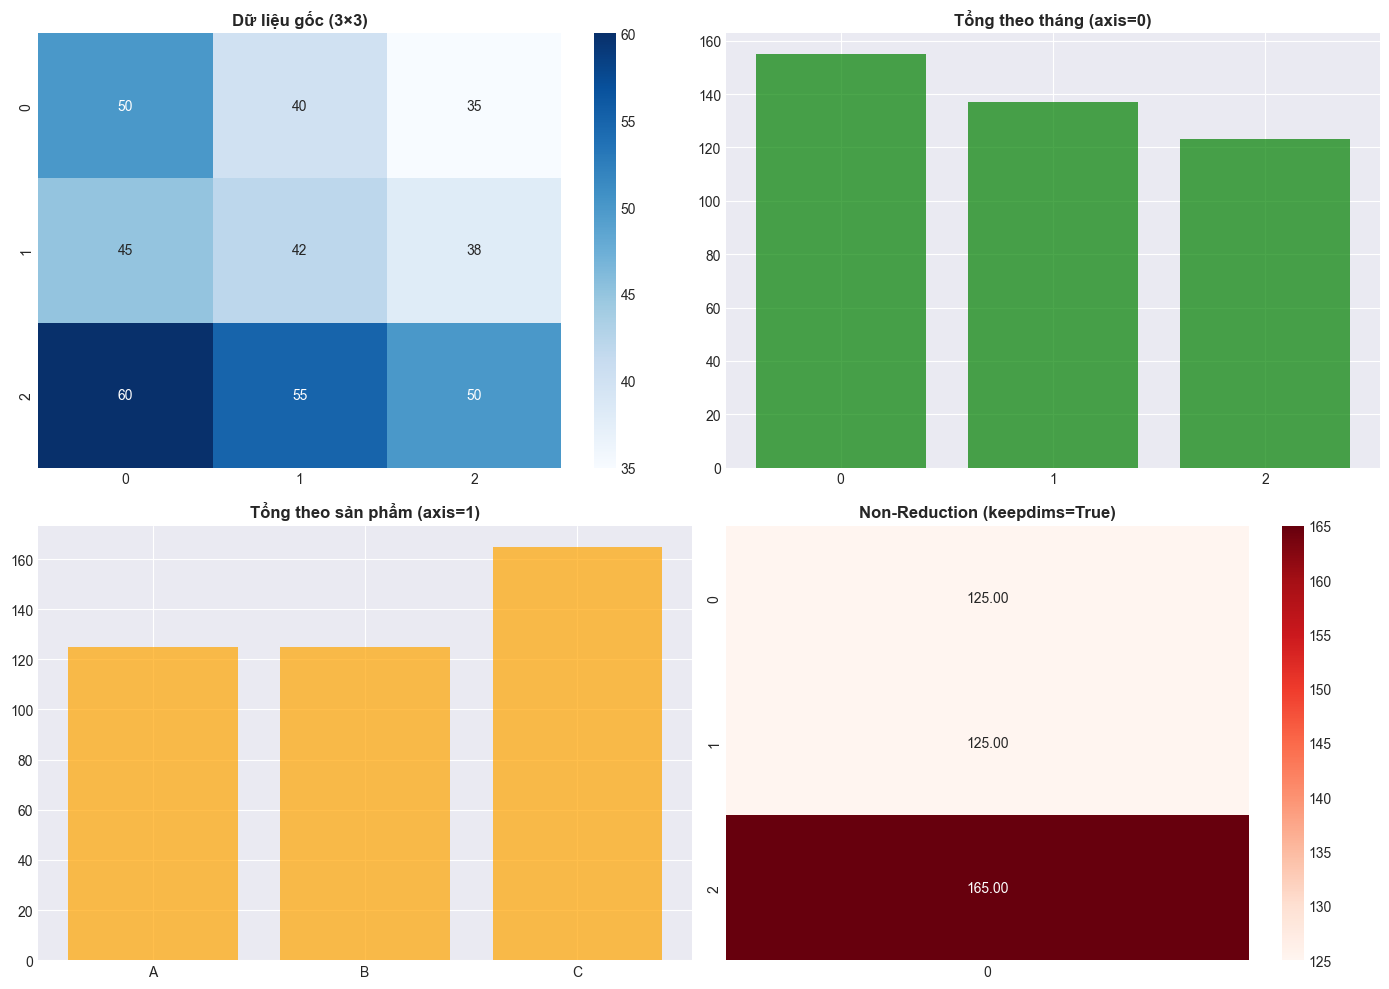

In [ ]:
# Visualization: Feasible Region và Optimal Point
# 📌 BROADCASTING: Scalar * Matrix để tính profit cho mỗi điểm
A_range = np.linspace(0, 50, 100)
B_range = np.linspace(0, 50, 100)
A_grid, B_grid = np.meshgrid(A_range, B_range)

# Broadcasting: profit_A_scalar (scalar) * A_grid (2D matrix) → broadcasting
Profit_grid = profit_A_scalar * A_grid + profit_B_scalar * B_grid

# Tính các ràng buộc
constraint1 = (120 - 2 * A_range) / 3  # B từ ràng buộc nguyên liệu
constraint2 = (160 - 4 * A_range) / 2  # B từ ràng buộc lao động

# Tạo mask cho feasible region (sử dụng element-wise operations)
feasible = (2 * A_grid + 3 * B_grid <= 120) & (4 * A_grid + 2 * B_grid <= 160) & (A_grid >= 0) & (B_grid >= 0)

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Contour plot của profit
contour = ax.contourf(A_grid, B_grid, Profit_grid, levels=20, alpha=0.6, cmap='viridis')
plt.colorbar(contour, ax=ax, label='Lợi nhuận (nghìn VNĐ)')

# Vẽ các đường ràng buộc
ax.plot(A_range, constraint1, 'r-', linewidth=2, label='Ràng buộc nguyên liệu: 2A + 3B ≤ 120')
ax.plot(A_range, constraint2, 'b-', linewidth=2, label='Ràng buộc lao động: 4A + 2B ≤ 160')

# Tô màu feasible region
feasible_region = np.zeros_like(A_grid)
feasible_region[feasible] = 1
ax.contourf(A_grid, B_grid, feasible_region, levels=[0.5, 1.5], colors=['lightblue'], alpha=0.3)

# Đánh dấu điểm tối ưu
if result.success:
    ax.plot(optimal_A, optimal_B, 'r*', markersize=20, label=f'Điểm tối ưu: ({optimal_A:.1f}, {optimal_B:.1f})')
    ax.annotate(f'Optimal\n({optimal_A:.1f}, {optimal_B:.1f})\nProfit: {max_profit:.0f}k',
                xy=(optimal_A, optimal_B), xytext=(optimal_A + 5, optimal_B + 5),
                arrowprops=dict(arrowstyle='->', color='red', lw=2),
                fontsize=12, fontweight='bold', color='red')

ax.set_xlabel('Số lượng sản phẩm A', fontsize=12, fontweight='bold')
ax.set_ylabel('Số lượng sản phẩm B', fontsize=12, fontweight='bold')
ax.set_title('Tối đa hóa lợi nhuận - Feasible Region và Optimal Point', fontsize=14, fontweight='bold')
ax.legend(loc='upper right', fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_xlim(0, 50)
ax.set_ylim(0, 50)

plt.tight_layout()
plt.show()


## Tổng kết: Các khái niệm Linear Algebra được áp dụng


In [29]:
if result.success:
    print("=" * 70)
    print("TỔNG KẾT: CÁC KHÁI NIỆM LINEAR ALGEBRA TRONG BÀI TOÁN")
    print("=" * 70)
    
    print("\n📌 1. SCALAR (0D):")
    print(f"   - profit_A = {profit_A_scalar}, profit_B = {profit_B_scalar}")
    print(f"   - Ứng dụng: Lưu trữ giá trị đơn lẻ (lợi nhuận mỗi đơn vị)")
    
    print("\n📌 2. VECTOR (1D):")
    print(f"   - c (hệ số) = {c}, b (giới hạn) = {b}, x* (nghiệm) = {x_optimal}")
    print(f"   - Ứng dụng: Biểu diễn hệ số, giới hạn, và nghiệm của bài toán")
    
    print("\n📌 3. MATRIX (2D):")
    print(f"   - A (ràng buộc) = \n{A}")
    print(f"   - Ứng dụng: Biểu diễn hệ phương trình ràng buộc")
    
    print("\n📌 4. DOT PRODUCT:")
    print(f"   - profit_vector @ x* = {profit_vector} @ {x_optimal} = {profit_dot:.2f}")
    print(f"   - Ứng dụng: Tính tổng lợi nhuận (tổng tích các phần tử tương ứng)")
    
    print("\n📌 5. MATRIX-VECTOR MULTIPLICATION:")
    print(f"   - A @ x* = {A @ x_optimal}")
    print(f"   - Ứng dụng: Kiểm tra ràng buộc (tính tài nguyên sử dụng)")
    
    print("\n📌 6. ELEMENT-WISE OPERATIONS:")
    print(f"   - profit_vector * x* = {profit_vector * x_optimal}")
    print(f"   - Ứng dụng: Tính lợi nhuận từng sản phẩm")
    
    print("\n📌 7. REDUCTION OPERATIONS:")
    print(f"   - sum(profit * x*) = {np.sum(profit_vector * x_optimal):.2f}")
    print(f"   - mean(profit * x*) = {np.mean(profit_vector * x_optimal):.2f}")
    print(f"   - Ứng dụng: Tổng hợp dữ liệu (giảm chiều từ vector → scalar)")
    
    print("\n📌 8. BROADCASTING:")
    print(f"   - profit_A_scalar * A_grid (scalar * 2D matrix)")
    print(f"   - Ứng dụng: Tính profit cho nhiều điểm cùng lúc (visualization)")
    
    print("\n" + "=" * 70)
    print("✅ Tất cả các khái niệm Linear Algebra đã được áp dụng thành công!")
    print("=" * 70)


TỔNG KẾT: CÁC KHÁI NIỆM LINEAR ALGEBRA TRONG BÀI TOÁN

📌 1. SCALAR (0D):
   - profit_A = 50, profit_B = 40
   - Ứng dụng: Lưu trữ giá trị đơn lẻ (lợi nhuận mỗi đơn vị)

📌 2. VECTOR (1D):
   - c (hệ số) = [-50 -40], b (giới hạn) = [120 160], x* (nghiệm) = [30. 20.]
   - Ứng dụng: Biểu diễn hệ số, giới hạn, và nghiệm của bài toán

📌 3. MATRIX (2D):
   - A (ràng buộc) = 
[[2 3]
 [4 2]]
   - Ứng dụng: Biểu diễn hệ phương trình ràng buộc

📌 4. DOT PRODUCT:
   - profit_vector @ x* = [50 40] @ [30. 20.] = 2300.00
   - Ứng dụng: Tính tổng lợi nhuận (tổng tích các phần tử tương ứng)

📌 5. MATRIX-VECTOR MULTIPLICATION:
   - A @ x* = [120. 160.]
   - Ứng dụng: Kiểm tra ràng buộc (tính tài nguyên sử dụng)

📌 6. ELEMENT-WISE OPERATIONS:
   - profit_vector * x* = [1500.  800.]
   - Ứng dụng: Tính lợi nhuận từng sản phẩm

📌 7. REDUCTION OPERATIONS:
   - sum(profit * x*) = 2300.00
   - mean(profit * x*) = 1150.00
   - Ứng dụng: Tổng hợp dữ liệu (giảm chiều từ vector → scalar)

📌 8. BROADCASTING:
   - 